<b>Exerício Final</b>

In [110]:
import pandas as pd
import datetime
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

cadastro_df = pd.read_csv(r'cadastro - cadastro.csv')
precos_df = pd.read_csv('preco da gasolina - preco da gasolina.csv')
salario_df = pd.read_csv('salario_profissoes - salario_profissoes.csv')

<b>Qual a idade média das pessoas no cadastro?</b>

In [2]:
now = datetime.datetime.now().year #Armazena o ano atual na variável

cadastro_df['idade'] = now - cadastro_df['ano_nascimento'] #cria a coluna e realiza a subtração do ano para ter a idade

idade_media = int(round(cadastro_df['idade'].mean(),0)) # criada a variável para calcular a média dos cadastrados

print('A Idade média dos cadastrados é {} anos'.format(idade_media)) #exibe resultado formatado


A Idade média dos cadastrados é 33 anos


<b> Quantos homens tem no cadastro?</b>

In [107]:
cadastro_df['contador'] = 1 #cria coluna de contador para realizar a contagem

homens = cadastro_df.loc[cadastro_df.sexo == 'm'] #seleciona apenas as linhas com sexo masculino

qt_homens = homens['contador'].sum() #soma a quantidade de linhas com valores do sexo  masculino
perc_homens = round(qt_homens / cadastro_df['sexo'].count(),2)*100 #conta para o percentual dos homens na base

print("Existem {} registros do sexo masculino e eles representam {}% do total".format(qt_homens,perc_homens))

Existem 16 registros do sexo masculino e eles representam 53.0% do total


<b>Quantas mulheres tem no cadastro ?</b>

In [4]:
cadastro_df['contador'] = 1 #cria coluna de contador para realizar a contagem

mulheres = cadastro_df.loc[cadastro_df.sexo == 'f'] #seleciona apenas as linhas com sexo feminino

qt_mulheres = mulheres['contador'].sum() #soma a quantidade de linhas com valores do sexo  feminino
perc_mulheres = round(qt_mulheres / cadastro_df['sexo'].count(),2)*100 #conta para o percentual de mulheres na base

print("Existem {} registros do sexo feminino e elas representam {}% do total".format(qt_mulheres,perc_mulheres))



Existem 14 registros do sexo feminino e elas representam 47.0% do total


<b>Alternativa 2: Quantas mulheres e homens tem no cadastro?</b>

In [115]:
cadastro_df['contador'] = 1 #cria coluna de contador para realizar a contagem

cadastro_df[['sexo','contador']].groupby('sexo').sum() #retorna dados agrupados pela coluna sexo com base do valor do contador

,contador
sexo,
f,14
m,16


<b>Qual a idade média dos homens e das mulheres?</b>

In [6]:
round(cadastro_df[['sexo','idade']].groupby('sexo').mean(),0) # retorna dados agrupados pelo sexo e com média da idade

,idade
sexo,
f,34.0
m,32.0


<b>Crie um gráfico de barras e mostre a distribuição de escolaridade no cadastro?</b>

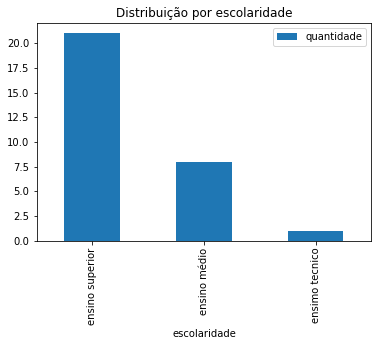

In [7]:
from collections import Counter

#Cria um dicionário para contabilizar número da escolaridade e converte valores para mínusculo
dict_escolaridade = dict(Counter(cadastro_df['escolaridade'].str.lower()))

#Criado Dataframe onde os contatos são chaves e a freqência os valores:
escolaridade_df = pd.DataFrame(dict_escolaridade.items(), columns=['escolaridade', 'quantidade'])

#Instrução para ordenar os valores pela frequênci
escolaridade_df = escolaridade_df.sort_values(by=['quantidade'], ascending=False)

#instrução do gráfico para exibir os resultados
escolaridade_df.plot(kind='bar', x = 'escolaridade', y='quantidade', title='Distribuição por escolaridade')


<b>Mostre a Média Salarial do cadastro?</b>

In [338]:
#Mesclando arquivos de cadastro com salários, profisão é a chave entre os arquivos
merged_cadastro_df = cadastro_df.merge(salario_df, left_on='profissão', right_on='Profissões') 

#Criando a coluna salario no dataframe e populando as linhas de acordo com o tempo de experiência delas
merged_cadastro_df.loc[merged_cadastro_df['experiencia profissional'] > 3, 'salario'] = merged_cadastro_df['salaior +3 anos']  
merged_cadastro_df.loc[merged_cadastro_df['experiencia profissional'] <= 3, 'salario'] = merged_cadastro_df['salario até 3 anos']

#cria novo dataframe com pessoas que recebem salário
media_salarios = merged_cadastro_df.loc[merged_cadastro_df['salario'] >0]

#Realiza a média dos valores
media_salarios = round(media_salarios['salario'].mean(),2)

#apresenta resultados formatado
print('A média salarial do cadastro é R$ {}'.format(media_salarios))




A média salarial do cadastro é R$ 5356.0


<b>Quem tem o maior salário?</b>

In [78]:
#Apresenta a profissão com maior valor de salário utilizando groupby, max e classificação pelo valor do salário
round(merged_cadastro_df[['profissão','salario']]
      .groupby('profissão')
      .max(),2).sort_values('salario', ascending=False).head(1)

,salario
profissão,
Médica,20000.0


<b>Tirando desempregado quem recebe menos?</b>

In [87]:
#Criado novo dataframe para tirar pessoas que não recebem salários
com_salarios_df = merged_cadastro_df.loc[merged_cadastro_df['salario'] > 0]

#Apresenta a profissão com maior valor de salário utilizando groupby, min e classificação pelo valor do salário
round(com_salarios_df[['profissão','salario']]
      .groupby('profissão')
      .min(),2).sort_values('salario', ascending=True).head(1)

,salario
profissão,
caixa de mercado,1200.0


<b>Quantas pessoas gostam de caminhar no final de semana?</b>

In [103]:
#Cria um novo dataframe considerando todas as linhas que contem o termo caminhar. A coluna é mutivalorada.
caminhada_df = cadastro_df.loc[cadastro_df['lazer_final_de_semana'].str.contains('caminhar')]

#Faz a contagem das linhas com este termo
qt_caminhada = caminhada_df['contador'].sum()

#apresenta formatado
print("{} pessoas fazem caminhadas no final de semana".format(qt_caminhada))



4 pessoas fazem caminhadas no final de semana


<b>Crie um gráfico mostrando a relação entre escolaridade e quem pratica esporte</b>

In [225]:
# reduz todos os valores da coluna para letra minuscula
cadastro_df['escolaridade'] = cadastro_df['escolaridade'].str.lower()

#cria uma coluna para atribuir valor um para quem respondeu que faz atividade física
cadastro_df.loc[cadastro_df['pratica_esporte'] == 'sim', 'contador_esporte'] = 1

#Cria dataframe apenas com os valores desejados e agrupados
relacao_df = cadastro_df[['escolaridade','contador','contador_esporte']].groupby('escolaridade').sum()

#Restaura o índice do dataframe:
relacao_df = relacao_df.reset_index()

#Cria listas para serem usadas no gráfico
labels =[]
estudantes = []
esportistas = []

for cell in relacao_df['escolaridade']:
    labels.append(cell)
    
for cell in relacao_df['contador']:
    estudantes.append(cell)

for cell in relacao_df['contador_esporte']:
    esportistas.append(cell)


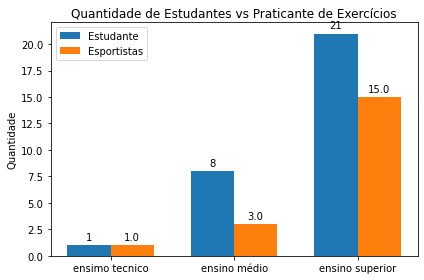

In [228]:
#Código do Gráfico

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, estudantes, width, label='Estudante')
rects2 = ax.bar(x + width/2, esportistas, width, label='Esportistas')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de Estudantes vs Praticante de Exercícios')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

<b>Crie um mapa de calor?</b>

In [334]:
#Incompleto. Estava criando um dataframe para convertê-lo em matriz para usá-lo no gráfico de mapa de calor.
# A ideia era visualizar o ano vs profissão
#Dataframe abaixo realiza o cálulo do ano de hoje menos a experiência para ter o ínicio da profissão
merged_cadastro_df['ano_profissao'] = now - merged_cadastro_df['experiencia profissional']

#Filtra o dataframe para ter apenas pessoas empregadas
new_dataset = merged_cadastro_df.loc[merged_cadastro_df['experiencia profissional'] > 0]

#restringe o dataframe para as colunas que iriam ser usadas
new_dataset = new_dataset[['ano_profissao','Profissões','contador']]
new_dataset

#proximo passo era inverter os anos como colunas e cruzar com as profissões
#Próximo passo seria aplicar array no código do gráfico de mapa de calor:

,ano_profissao,Profissões,contador
0,2016,Cientista de Dados,1
1,2018,dona de casa,1
3,2019,desempregado,1
4,2017,Gerente de Projeto,1
5,2018,Auxiliar de Enfermagem,1
6,2016,caixa de mercado,1
7,2018,estagiario,1
8,2019,estagiario,1
9,2015,Médica,1
10,2018,estudante,1


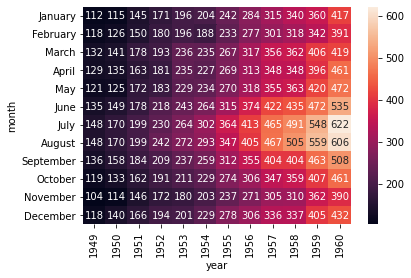

In [340]:
#Modelo de HeatMap

import seaborn as sns

flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights, annot=True, fmt="d")

<b>Mostre de forma gráfica a distribuição de estados do cadastro?</b>

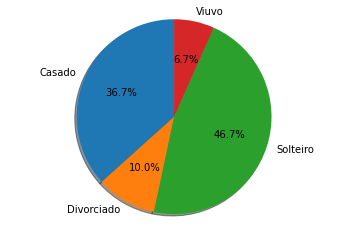

In [296]:
#processos para harmonizar gêneros da coluna estado_civil
cadastro_df.loc[cadastro_df['estado_civil'].str.contains('Casad'), 'estado_civil2'] = 'Casado'
cadastro_df.loc[cadastro_df['estado_civil'].str.contains('Viuv'), 'estado_civil2'] = 'Viuvo'
cadastro_df.loc[cadastro_df['estado_civil'].str.contains('Solteir'), 'estado_civil2'] = 'Solteiro'
cadastro_df.loc[cadastro_df['estado_civil'].str.contains('Divorciad'), 'estado_civil2'] = 'Divorciado'

#Criado dataframe para agrupar estado civil
estado_civil_df = cadastro_df[['estado_civil2','contador']].groupby('estado_civil2').sum()

#Restaurando a indexação
estado_civil_df = estado_civil_df.reset_index()

#Criada listas para alimentar o gráfico
labels_estado_civil =[]
qt_estado_civil = []


for cell in estado_civil_df['estado_civil2']:
    labels_estado_civil.append(cell)
    
for cell in estado_civil_df['contador']:
    qt_estado_civil.append(cell)

#Código do gráfico
explode = (0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(qt_estado_civil, explode=explode, labels=labels_estado_civil, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()
